In [6]:
# we used pd.read_csv for accessing our file
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\Harpreet Kaur\\Documents\\rentfaster.csv")

In [7]:
# we can use head function for accessing initial raws so we can take overview of data
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,18-Nov,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [8]:
# info() function provide detailed information of data such as datatype,nonull value in each column, memory usage and number of entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [9]:
# this function return the number of raw and column
df.shape

(25771, 18)

In [10]:
# we just created loop for accessing columns one by one and in loop 
#we used unique and nunique fuctions so we can get what type of unique value we have in each column and number of unique value in each column
count= 0
for column in df.columns:
    unique_value= df[column].unique()
    unique_number=df[column].nunique()
    count+=1
    print(f"{count}. unique value in {column} : {unique_value} \n ")
    print(f"{count}. unique value number in {column} : {unique_number} \n ")
    

1. unique value in rentfaster_id : [468622  92670 565052 ... 334133 334285 334284] 
 
1. unique value number in rentfaster_id : 9614 
 
2. unique value in city : ['Airdrie' 'Aldersyde' 'Balzac' 'Banff' 'Beaumont' 'Beiseker'
 'Black Diamond' 'Blackfalds' 'Bonnyville' 'Bowden' 'Brooks' 'Bruderheim'
 'Calgary' 'Camrose' 'Canmore' 'Carmangay' 'Chestermere' 'Cochrane'
 'Cold Lake' 'Crossfield' 'Crowsnest Pass' 'De Winton' 'Drumheller'
 'Duchess' 'Edmonton' 'Edson' 'Fort McMurray' 'Fort Saskatchewan'
 'Grande Prairie' 'High River' 'Innisfail' 'Lacombe' 'Langdon' 'Leduc'
 'Lethbridge' 'Medicine Hat' 'Morinville' 'Nisku' 'Okotoks' 'Olds'
 'Peace River' 'Ponoka' 'Priddis' 'Red Deer' 'Rocky View' 'Shaughnessy'
 'Sherwood Park' 'Slave Lake' 'Spruce Grove' 'St. Albert' 'St. Paul'
 'Stony Plain' 'Strathmore' 'Sundre' 'Sylvan Lake' 'Wainwright'
 'Westerose' 'Westlock' 'Wetaskiwin' 'Whitecourt' 'Abbotsford' 'Burnaby'
 'Campbell River' 'Chilliwack' 'Colwood' 'Comox' 'Coquitlam' 'Courtenay'
 'Cranbrook

In [11]:
# we dropped unwanted columns so we can do better analysis
df.drop(columns=["rentfaster_id","city","address","latitude","longitude","link","availability_date"],inplace= True)

In [12]:
# we used this function for getting number of null value in each column
df.isnull().sum()

province         0
lease_term      46
type             0
price            0
beds           132
baths          134
sq_feet       4112
furnishing       0
smoking       2702
cats           173
dogs           173
dtype: int64

In [13]:
 
#df["baths"].replace(["nan","none"], np.nan, inplace= True)

In [14]:
# our all values have sting formate so we converted it into numeric by using pandas
df["baths"]= pd.to_numeric(df["baths"], errors="coerce")

In [15]:
# from below columns, we dropped raws which hold null value as we can not to analysis with null values 
df.dropna(subset=["lease_term","beds","baths","smoking","cats","dogs"],inplace=True)

In [16]:
# sq_feet column hold all value in sting form so firstly, 
#we removed Sq. Ft. from value and convert string into numeric form by using to_numeric function
df["sq_feet"]= df["sq_feet"].str.replace("Sq. Ft.", " ",regex=False)
df["sq_feet"]=pd.to_numeric(df["sq_feet"], errors = "coerce")
print(df)

           province lease_term       type   price    beds  baths  sq_feet  \
0           Alberta  Long Term  Townhouse  2495.0  2 Beds    2.5   1403.0   
1           Alberta  Long Term  Townhouse  2695.0  3 Beds    2.5   1496.0   
2           Alberta  Long Term  Townhouse  2295.0  2 Beds    2.5   1180.0   
3           Alberta  Long Term  Townhouse  2095.0  2 Beds    2.5   1403.0   
4           Alberta  Long Term  Townhouse  2495.0  2 Beds    2.5   1403.0   
...             ...        ...        ...     ...     ...    ...      ...   
25766  Saskatchewan  Long Term  Apartment   920.0  Studio    1.0    400.0   
25767  Saskatchewan  Long Term  Apartment  1450.0  3 Beds    1.0    810.0   
25768  Saskatchewan  Long Term  Apartment  1125.0   1 Bed    1.0    520.0   
25769  Saskatchewan  Long Term  Apartment   920.0  Studio    1.0    400.0   
25770  Saskatchewan  Long Term  Apartment  1285.0  2 Beds    1.0    700.0   

        furnishing      smoking  cats  dogs  
0      Unfurnished  Non-Smoki

In [17]:
# after converting all value in number form , we replaced null value by mean using fillna function
df["sq_feet"]= df["sq_feet"].fillna(df["sq_feet"].mean())
df["sq_feet"]

0        1403.0
1        1496.0
2        1180.0
3        1403.0
4        1403.0
          ...  
25766     400.0
25767     810.0
25768     520.0
25769     400.0
25770     700.0
Name: sq_feet, Length: 22864, dtype: float64

In [18]:
# we used label encoder for converting qaulitive data to qauntitive data as we need numeric value for analysis and we can find pattern  
# there are other technique for this type of conversion but we used this one as it is more suitable for random forest and decision tree regression 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["province"]= le.fit_transform(df["province"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: 'Alberta', 1: 'British Columbia', 2: 'Manitoba', 3: 'New Brunswick', 4: 'Newfoundland and Labrador', 5: 'Northwest Territories', 6: 'Nova Scotia', 7: 'Ontario', 8: 'Quebec', 9: 'Saskatchewan'}


In [19]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["lease_term"]= le.fit_transform(df["lease_term"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: '12 months', 1: '6 months', 2: 'Long Term', 3: 'Negotiable', 4: 'Short Term', 5: 'months'}


In [20]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["type"]= le.fit_transform(df["type"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: 'Acreage', 1: 'Apartment', 2: 'Basement', 3: 'Condo Unit', 4: 'Duplex', 5: 'House', 6: 'Loft', 7: 'Main Floor', 8: 'Mobile', 9: 'Room For Rent', 10: 'Townhouse', 11: 'Vacation Home'}


In [21]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["beds"]= le.fit_transform(df["beds"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: '1 Bed', 1: '2 Beds', 2: '3 Beds', 3: '4 Beds', 4: '5 Beds', 5: '6 Beds', 6: '7 Beds', 7: '8 Beds', 8: '9 Beds', 9: 'Studio'}


In [22]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["furnishing"]= le.fit_transform(df["furnishing"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: 'Furnished', 1: 'Negotiable', 2: 'Unfurnished', 3: 'Unfurnished, Negotiable'}


In [23]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["smoking"]= le.fit_transform(df["smoking"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: 'Negotiable', 1: 'Non-Smoking', 2: 'Smoke Free Building', 3: 'Smoking Allowed'}


In [24]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["cats"]= le.fit_transform(df["cats"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: False, 1: True}


In [25]:
#we used label encoder for converting qaulitive data to qauntitive data 
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)
le=LabelEncoder()
df["dogs"]= le.fit_transform(df["dogs"])
lambel_map = dict(enumerate(le.classes_))
print(lambel_map)

{0: False, 1: True}


In [26]:
#now we again checked for null value and we don't have any null value so we can go for further step
df.isnull().sum()

province      0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [27]:
# now, we can see that all coulumn have integer or float value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22864 entries, 0 to 25770
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    22864 non-null  int32  
 1   lease_term  22864 non-null  int32  
 2   type        22864 non-null  int32  
 3   price       22864 non-null  float64
 4   beds        22864 non-null  int32  
 5   baths       22864 non-null  float64
 6   sq_feet     22864 non-null  float64
 7   furnishing  22864 non-null  int32  
 8   smoking     22864 non-null  int32  
 9   cats        22864 non-null  int32  
 10  dogs        22864 non-null  int32  
dtypes: float64(3), int32(8)
memory usage: 1.4 MB


In [28]:
# we can see min,max, standard diviation , mean and other things by using this function
df.describe ()

,province,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
count,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000,22864.00000,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000
mean,2.600070,2.084106,2.703989,2126.693650,1.364328,1.43317,896.875709,1.797717,1.027379,0.637771,0.609430
std,3.448162,0.363760,2.794517,951.469468,2.097992,0.66811,450.549901,0.588398,0.224944,0.480655,0.487889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1600.000000,0.000000,1.00000,650.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,2000.000000,1.000000,1.00000,896.875709,2.000000,1.000000,1.000000,1.000000
75%,7.000000,2.000000,3.000000,2500.000000,2.000000,2.00000,986.000000,2.000000,1.000000,1.000000,1.000000
max,9.000000,5.000000,11.000000,29990.000000,9.000000,8.00000,11700.000000,3.000000,3.000000,1.000000,1.000000


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(574731.1199548995, 0.39239487559690633)

In [30]:


# Preprocessing for numerical data
numerical_features = X.columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Create a pipeline with preprocessing and the model
model = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', RandomForestRegressor())])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best Model: Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])
Mean Squared Error: 326971.67597253696
R-squared: 0.6543258943918482


### logistic model

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
#model training
gb_reg.fit(X_train,y_train)
#doing predictions
y_pred=gb_reg.predict(X_test)
#model evaluation
mse_g = mean_squared_error(y_test, y_pred)
r2_g = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse_g:.2f}")
print(f"R-squared: {r2_g:.2f}")

Mean Squared Error: 346559.13
R-squared: 0.63


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [31]:
model = Pipeline(steps=[
     ('preprocessor', numerical_transformer),
     ('regressor', DecisionTreeRegressor(random_state=42))])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__max_depth': [None,10,20,30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model: {best_model}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best Model: Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=30, random_state=42))])
Mean Squared Error: 479036.1398108078
R-squared: 0.4935635061032294


### visualization

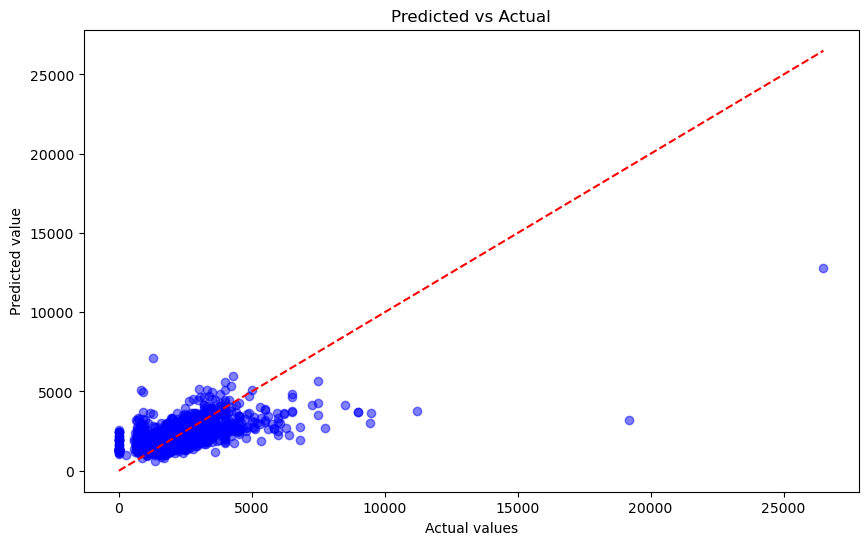

In [32]:
import matplotlib.pyplot as plt
# using scatter plot for elucidating visualization 
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_linear,color='blue',alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--')
plt.title('Predicted vs Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted value')
plt.show()


In [33]:
df.dtypes

province        int32
lease_term      int32
type            int32
price         float64
beds            int32
baths         float64
sq_feet       float64
furnishing      int32
smoking         int32
cats            int32
dogs            int32
dtype: object

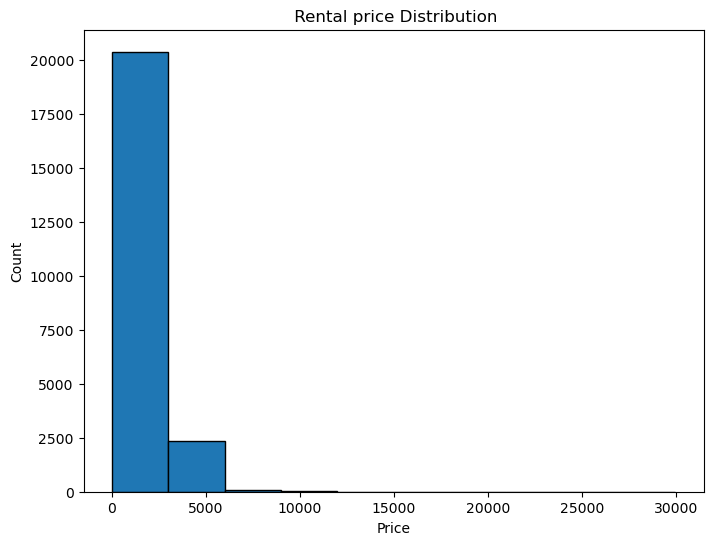

In [34]:
import matplotlib.pyplot as plt
# using histogram for more visualisation
plt.figure(figsize=(8,6))
plt.hist(df['price'],bins=10, edgecolor='black')
plt.title(" Rental price Distribution")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


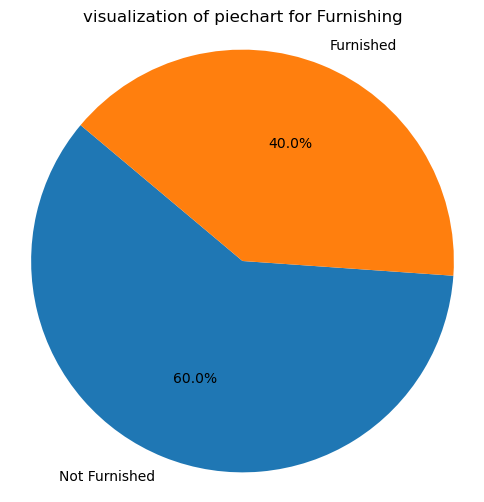

In [35]:
furn_count=[60,40]
labels=['Not Furnished','Furnished']
plt.figure(figsize=(6,6))
plt.pie(furn_count,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title( 'visualization of piechart for Furnishing')
plt.axis('equal')    # equal here shows that pie is drwan as a circle
plt.show()

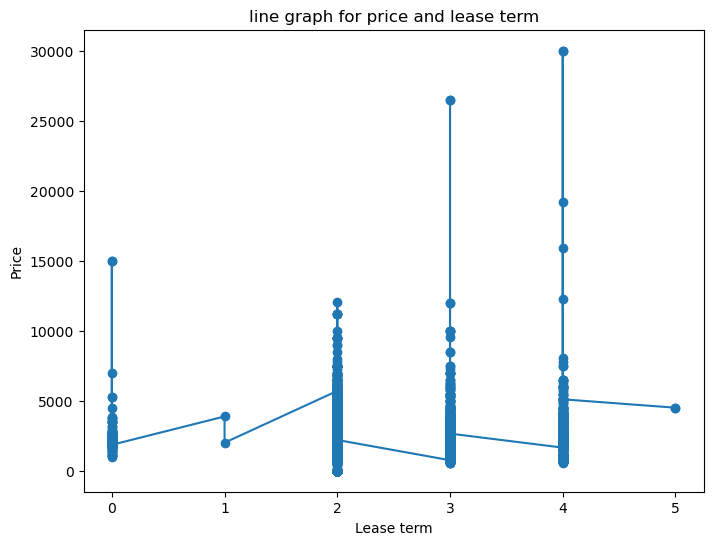

In [36]:
val= df.sort_values(by="lease_term")
plt.figure(figsize=(8,6))
plt.plot(val['lease_term'],val['price'],marker='o',linestyle='-',label='price')
plt.title("line graph for price and lease term")
plt.xlabel("Lease term")
plt.ylabel("Price")
plt.show()


c:\Users\Harpreet Kaur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Harpreet Kaur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Harpreet Kaur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Harpreet Kaur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

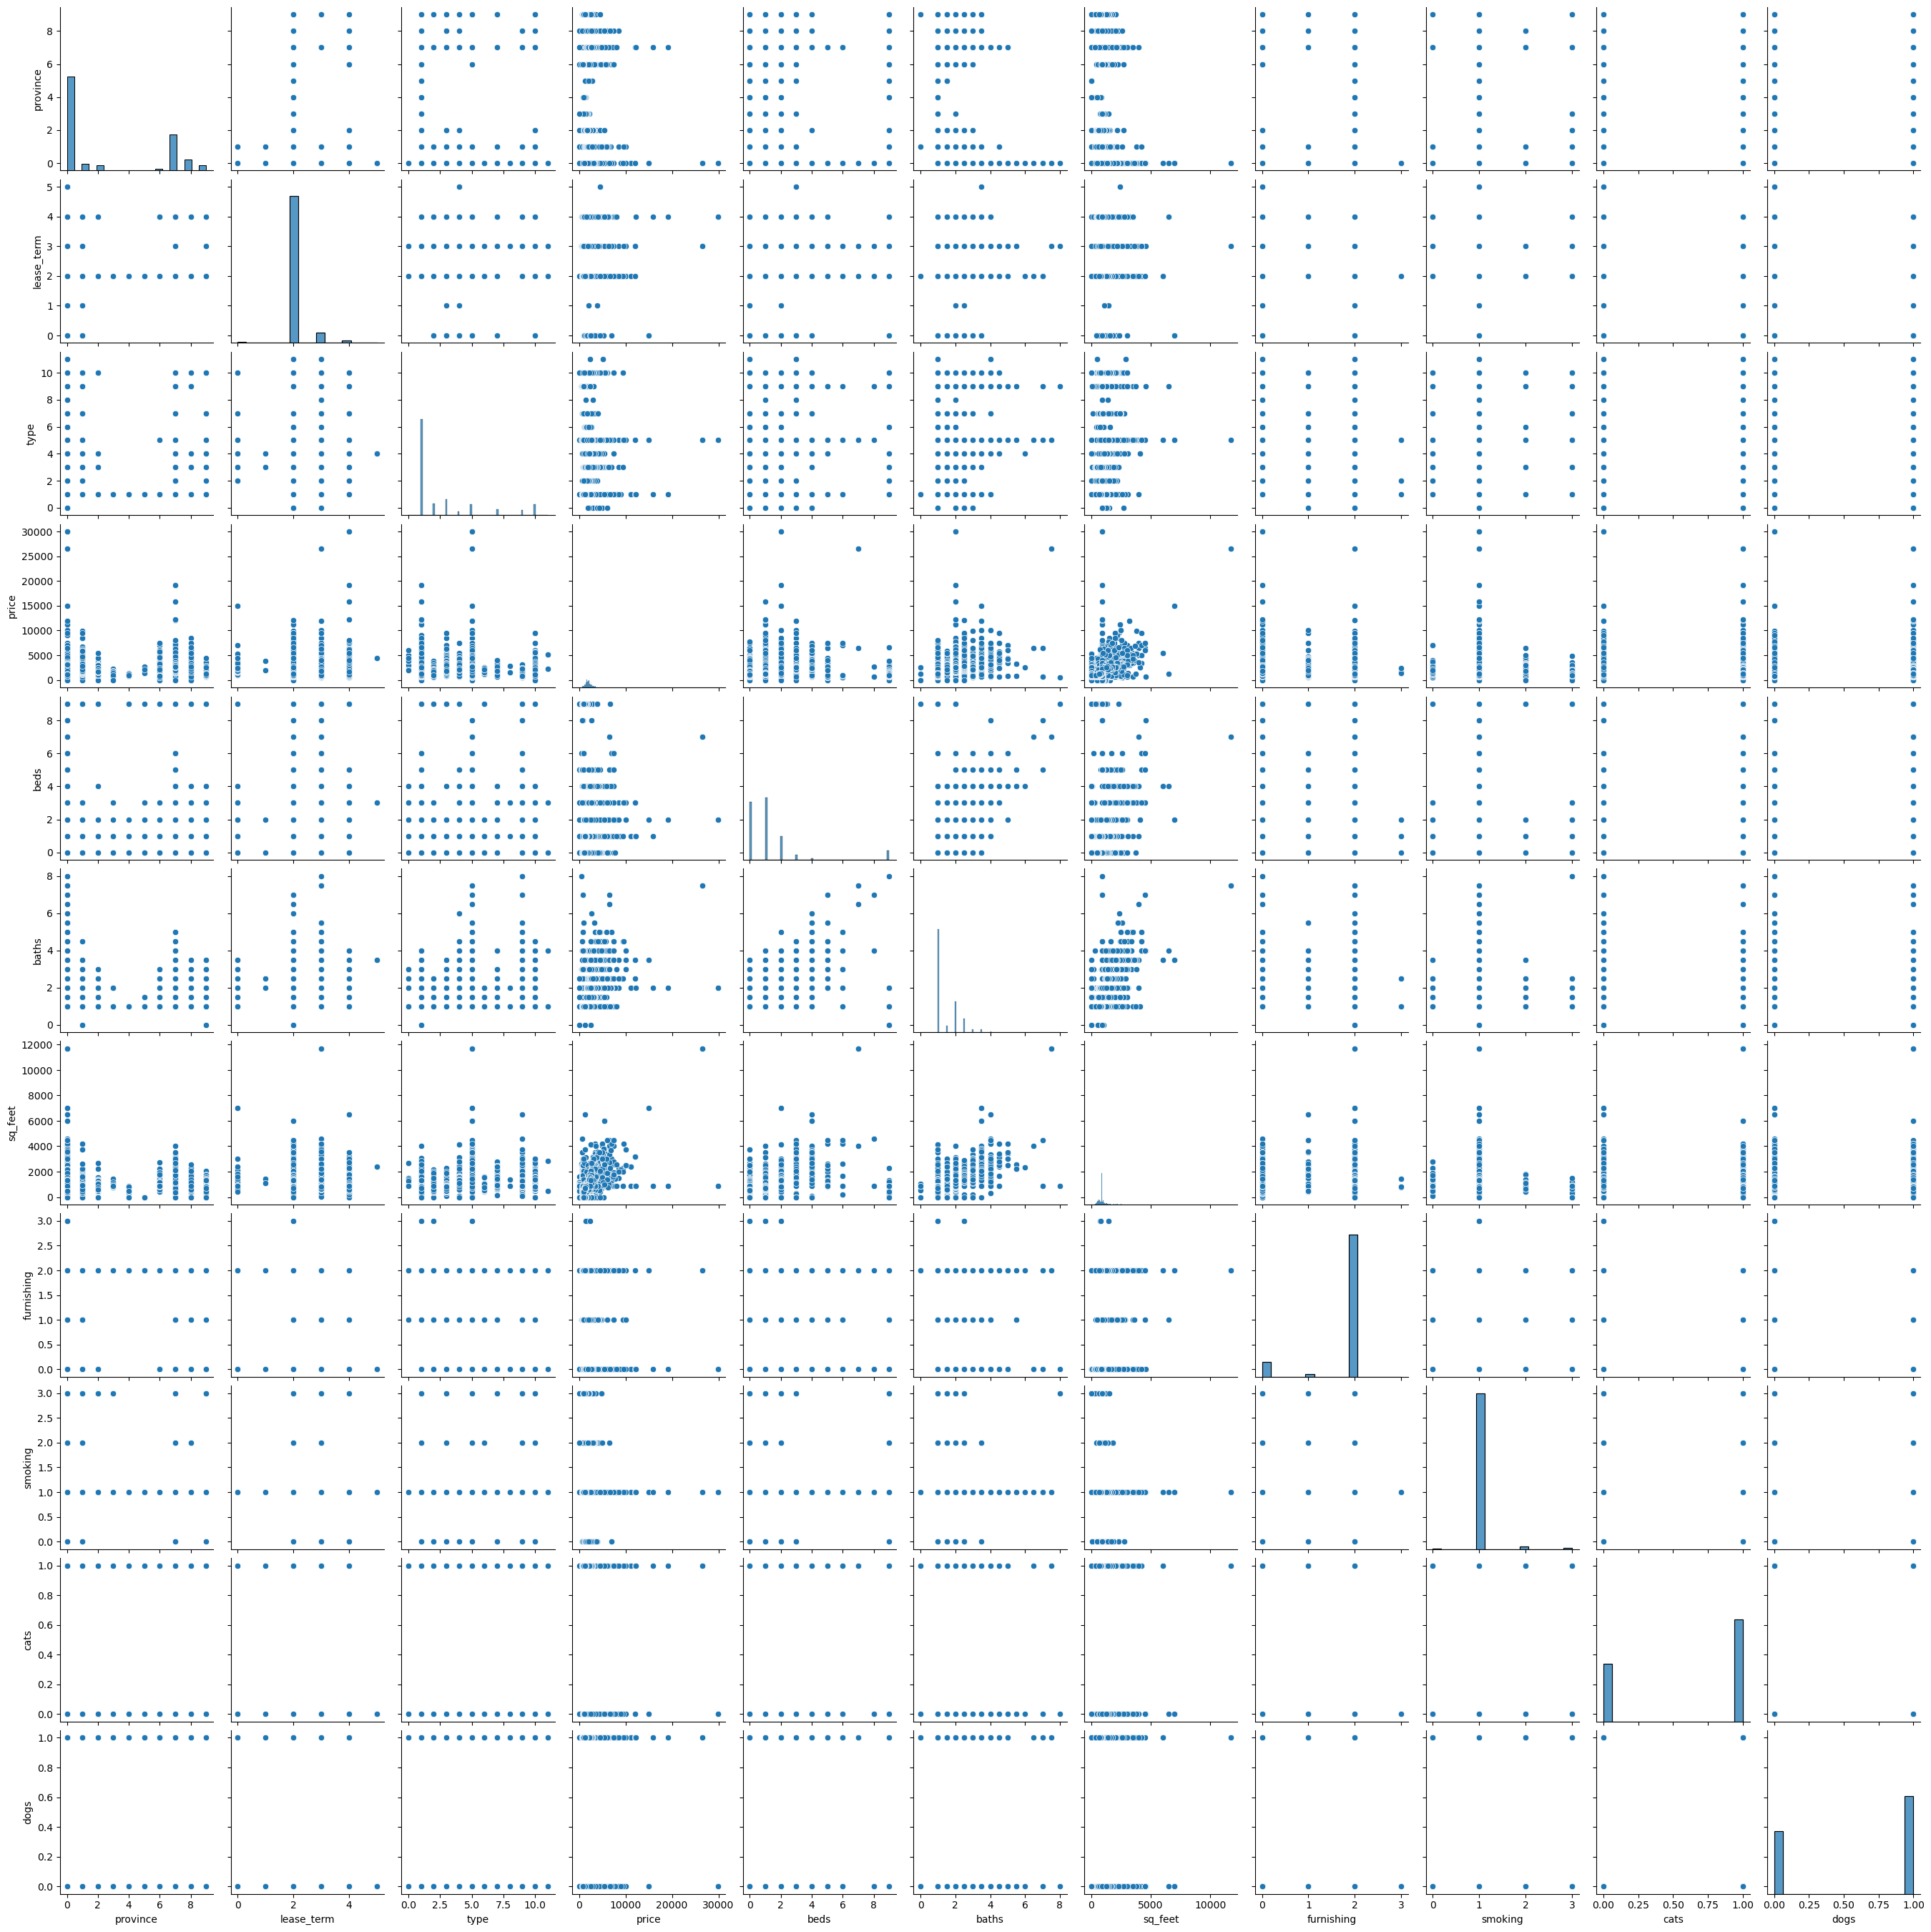

In [38]:
import seaborn as sns
num_col=df.select_dtypes(include=['int32','float64'])
sns.pairplot(num_col)

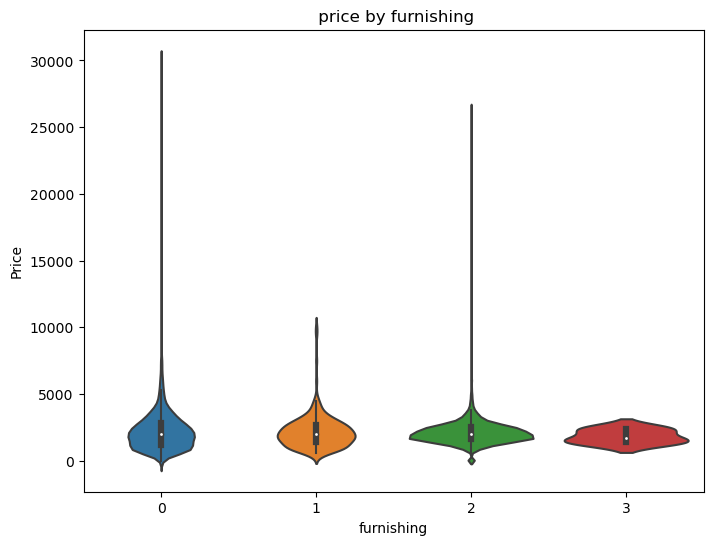

In [51]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.violinplot(x='furnishing',y='price',data=df)
plt.title(" price by furnishing")
plt.xlabel("furnishing")
plt.ylabel("Price")
plt.show()

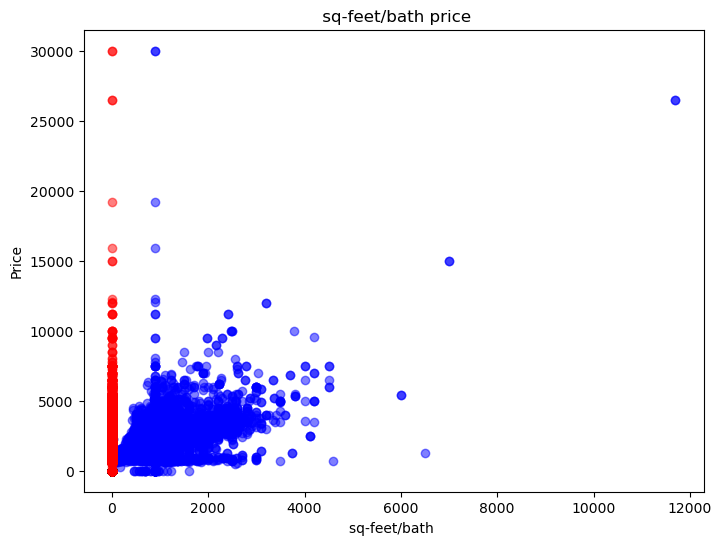

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(df['sq_feet'],df['price'],color='b',alpha=0.5,label='sq-feet')
plt.scatter(df['baths'],df['price'],color='r',alpha=0.5,label='baths')
plt.title(" sq-feet/bath price")
plt.xlabel("sq-feet/bath ")
plt.ylabel("Price")
plt.show()

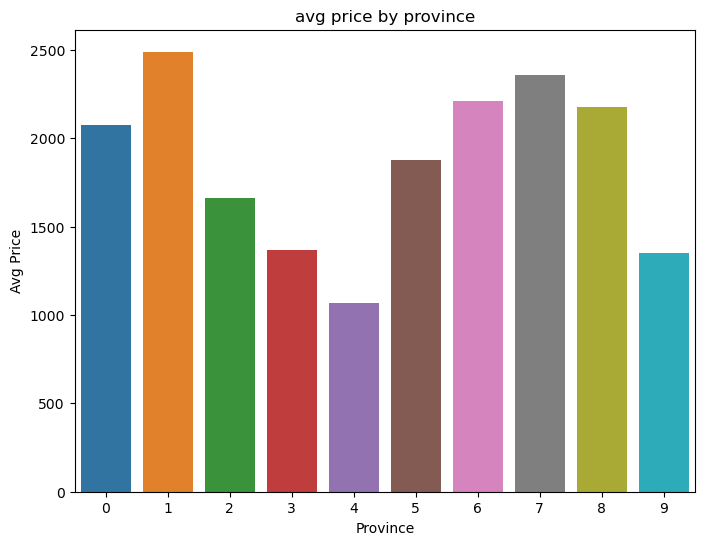

In [56]:
avg_price_province=df.groupby("province")['price'].mean().sort_values()
plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_province.index,y=avg_price_province.values,data=df)
plt.title("avg price by province")
plt.xlabel("Province")
plt.ylabel("Avg Price")
plt.show()

c:\Users\Harpreet Kaur\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


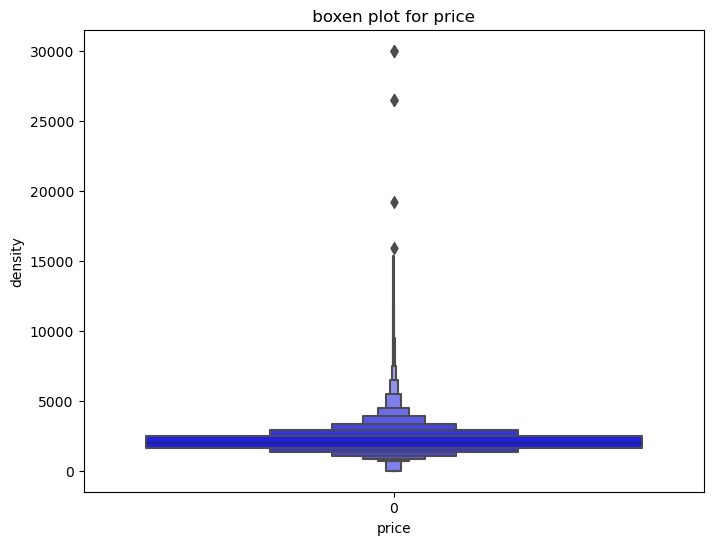

In [60]:
plt.figure(figsize=(8,6))
sns.boxenplot(df['price'],color='blue')
plt.title(" boxen plot for price ")
plt.xlabel("price")
plt.ylabel("density")
plt.show()